In [5]:
import pandas as pd

In [6]:
# read the data
df = pd.read_json("../classwork/data/aliens-1.json")
df = pd.json_normalize(df["results"])
df

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"
5,Audrey II,5.0,9.0,I'm just a mean green mother from outer space ...
6,Marvin,3.0,6.0,Where's the kaboom? There was supposed to be a...
7,Rocky,1.0,1.0,"Hey, your face is leaking! I haven't seen that..."
8,Barsoomus invadus,5.0,8.0,Don't run! We are your friends!
9,Queller,7.5,3.5,grrr! argh!


In [7]:
# extract the features we want to use! everything but catchphrase
df = df.drop("catchphrase", axis=1)

In [8]:
df.head()

,name,slimy,kill humans
0,stitch,1.0,2.0
1,E.T.,2.0,1.0
2,Harvester,9.0,10.0
3,kang,10.0,8.0
4,kodos,10.0,7.0


In [9]:
## Clustering begins now!
k = 2
# step one pick random points as centroids
centroids = df.sample(n=k)

In [10]:
centroids

,name,slimy,kill humans
0,stitch,1.0,2.0
39,Mosa,4.0,6.0


In [11]:
import scipy.spatial.distance as ssd

# for each point in data, assign the point to its closest centroid
# we need a distance function
# lets use euclidean
# centroids can be 0 and 1 for k=2
centroid_assignments = []
for i in range(len(df)):
    current_point = df.iloc[i][["slimy", "kill humans"]]

    min_dist = float("inf")
    min_centroid = -1
    # COMPUTE DISTANCE TO EACH CENTROID
    for j in range(len(centroids)):
        current_centroid = centroids.iloc[j][["slimy", "kill humans"]]
        distance = ssd.euclidean(current_centroid, current_point)

        # if distance was min, assign min distance and min centroid
        if distance < min_dist:
            min_dist = distance
            min_centroid = j
    centroid_assignments.append(min_centroid)

centroid_assignments



[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1]

<Axes: xlabel='slimy', ylabel='kill humans'>

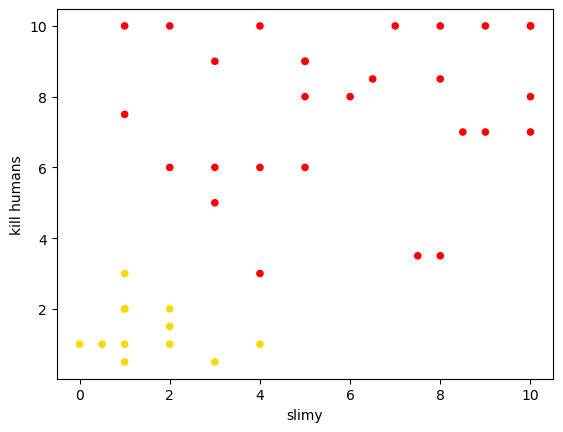

In [12]:
# add this cluster to our dataframe for viz
df["cluster"] = centroid_assignments
# add color to our df
import numpy as np
df["color"] = np.where(df["cluster"]==1, "red", "gold")
df.plot.scatter(x="slimy", y="kill humans", c="color")

In [16]:
def compute_centroids(df, k):
    centroids = []
    for cluster in range(k):
        cluster_data = df[df['cluster'] == cluster]
        x_avg = cluster_data['x'].mean()
        y_avg = cluster_data['y'].mean()
        centroids.append([x_avg, y_avg])
    return np.array(centroids)

In [19]:
# move your centroids based on the newly clustered data
df.head()
# new centroid for 0 would be slimy=1.5 and kill humans = 1.5
# new centroid for 1 would be slimy = mean(9, 10, 10) and kill humans = 
# mean(10, 8, 7)

# rename the dataframe columns to slimy = x and kill humans = y
# TASK: 
df = df.rename(columns = {"slimy": "x", "kill humans": "y"})

# PPP 5!!!


centroids = compute_centroids(df, k)

# convert these centroids to a dataframe
centroids = pd.DataFrame(centroids, columns = ["x", "y"])
centroids

,x,y
0,1.541667,1.375000
1,5.875000,7.696429


In [20]:
# function to create clusters
# this will update the clusters column in dataframe to the new clusters based
# on centroids
def compute_clusters(df, centroids):
    centroid_assignments = []
    for i in range(len(df)):
        current_point = df.iloc[i][["x", "y"]]

        min_dist = float("inf")
        min_centroid = -1
        # COMPUTE DISTANCE TO EACH CENTROID
        for j in range(len(centroids)):
            current_centroid = centroids.iloc[j][["x", "y"]]
            distance = ssd.euclidean(current_centroid, current_point)

            # if distance was min, assign min distance and min centroid
            if distance < min_dist:
                min_dist = distance
                min_centroid = j
        centroid_assignments.append(min_centroid)

    # add this cluster to our dataframe for viz
    df["cluster"] = centroid_assignments

In [23]:
# repeat these steps
for iteration in range(10):
    # computing clusters
    compute_clusters(df, centroids)
    
    # compute centroids
    centroids = compute_centroids(df, k)

    # convert these centroids to a dataframe
    centroids = pd.DataFrame(centroids, columns = ["x", "y"])


In [24]:
def plot_data(df):
    df["color"] = np.select([df["cluster"]==0, df["cluster"]==1,
                             df["cluster"]==2, df["cluster"]==3,
                             df["cluster"]==4],
                            ["red", "gold", "green", "purple", "black"]
                           )
    # df["color"] = np.where(df["cluster"]==1, "red", "gold")
    df.plot.scatter(x="x", y="y", c="color")


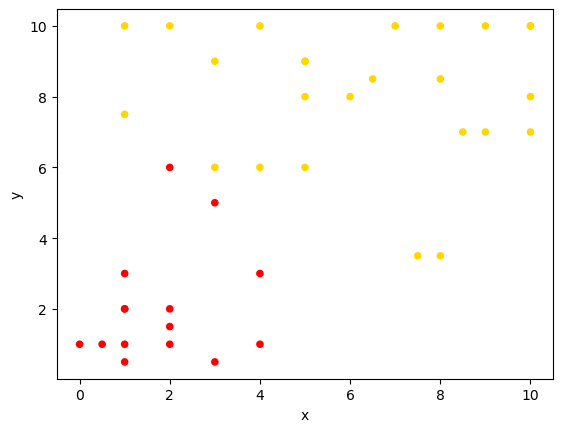

In [25]:
plot_data(df)

### Clustering with Text

In [27]:
# read the data
df = pd.read_json("../classwork/data/aliens-1.json")
df = pd.json_normalize(df["results"])
df

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"
5,Audrey II,5.0,9.0,I'm just a mean green mother from outer space ...
6,Marvin,3.0,6.0,Where's the kaboom? There was supposed to be a...
7,Rocky,1.0,1.0,"Hey, your face is leaking! I haven't seen that..."
8,Barsoomus invadus,5.0,8.0,Don't run! We are your friends!
9,Queller,7.5,3.5,grrr! argh!


In [28]:
# drop the slimy and kill humans column from df
df = df.drop(["slimy", "kill humans"], axis=1)

In [29]:
df.shape

(40, 2)

In [30]:
# import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# create our tfidf vectors
vectorizer = TfidfVectorizer(stop_words="english")
vectorized_data = vectorizer.fit_transform(df["catchphrase"])

In [32]:
# just for fun, look at this matrix in a df
pd.DataFrame(vectorized_data.todense(), columns=vectorizer.get_feature_names_out()).head()

,ahead,alien,argh,arrives,ass,attack,away,ball,balloon,banged,...,tomorrow,took,truth,vote,want,wants,wife,world,worry,yes
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.512419,0.0,0.0,0.0,0.0,0.0,0.46074,0.0,0.0,0.0,...,0.0,0.0,0.0,0.512419,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# import PCA
from sklearn.decomposition import PCA

In [34]:
# create our components!
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_data.toarray())
reduced_data.shape

(40, 2)

In [35]:
# add to data frame!
df[["x", "y"]] = reduced_data
df.head()

,name,catchphrase,x,y
0,stitch,ohana means family family means no one is left...,-0.004005,0.003895
1,E.T.,E.T. phone home!,-0.008690,0.008757
2,Harvester,I would like to conquer your planet,-0.005983,0.005906
3,kang,Go ahead! Throw your vote away!,-0.055602,-0.076684
4,kodos,"Eat, Simpsons! Grow large with food!",-0.004005,0.003895


In [36]:
# clustering!
k = 5
# step one pick random points as centroids
centroids = df.sample(n=k)

In [38]:
# repeat these steps
for iteration in range(10):
    # computing clusters
    compute_clusters(df, centroids)
    
    # compute centroids
    centroids = compute_centroids(df, k)

    # convert these centroids to a dataframe
    centroids = pd.DataFrame(centroids, columns = ["x", "y"])

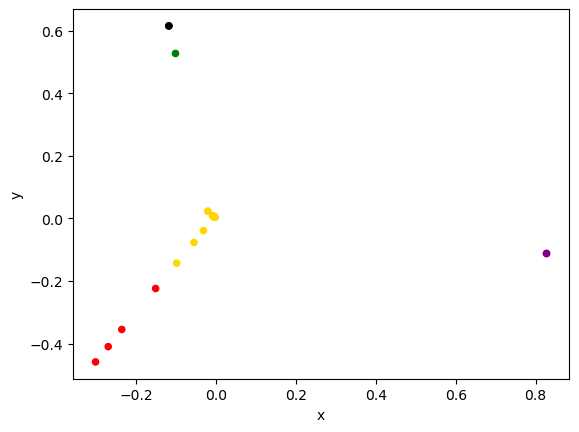

In [39]:
plot_data(df)

In [40]:
df[df.color=="purple"]

,name,catchphrase,x,y,cluster,color
13,Terminator,I'll be back,0.827205,-0.112181,3,purple
18,Pennywise,You'll float too!,0.827205,-0.112181,3,purple
